In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

## Eurovision Dataset

In [29]:
# Eurovision Dataset URL https://eurovision.tv/history/full-split-results
df = pd.read_csv('https://assets.datacamp.com/production/course_2072/datasets/eurovision-2016.csv')
df.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [30]:
# Fill NaN values
df.fillna(0, inplace=True)
df.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,0.0,0.0
1,Albania,Czech Republic,21,15,25,23,16,22,22,0.0,0.0
2,Albania,The Netherlands,22,14,23,24,21,24,24,0.0,0.0
3,Albania,Azerbaijan,19,12,11,21,11,13,19,0.0,0.0
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [31]:
# Sort by countries
df.sort_values(['From country', 'To country'], inplace=True)
df.head(10)

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
25,Albania,Armenia,12,24,14,3,25,15,9,0.0,2.0
12,Albania,Australia,1,1,2,1,3,1,1,12.0,12.0
23,Albania,Austria,6,23,19,19,14,16,13,0.0,0.0
3,Albania,Azerbaijan,19,12,11,21,11,13,19,0.0,0.0
0,Albania,Belgium,20,16,24,22,24,25,14,0.0,0.0
7,Albania,Bulgaria,11,3,6,13,6,7,3,4.0,8.0
16,Albania,Croatia,24,19,16,18,18,21,20,0.0,0.0
13,Albania,Cyprus,25,11,21,25,20,23,12,0.0,0.0
1,Albania,Czech Republic,21,15,25,23,16,22,22,0.0,0.0
10,Albania,France,3,9,1,9,1,2,11,10.0,0.0


In [33]:
df = df.pivot(index='From country', columns='To country', values='Televote Points')
df.head()

To country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,2.0,12.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,4.0,0.0,5.0,7.0,0.0,0.0,3.0,0.0,6.0,0.0
Armenia,NaN,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,...,0.0,5.0,1.0,12.0,0.0,0.0,2.0,0.0,10.0,0.0
Australia,0.0,NaN,3.0,0.0,12.0,10.0,0.0,0.0,0.0,7.0,...,1.0,6.0,0.0,5.0,0.0,2.0,0.0,0.0,8.0,4.0
Austria,0.0,3.0,NaN,0.0,0.0,5.0,0.0,0.0,0.0,1.0,...,0.0,0.0,12.0,8.0,4.0,0.0,7.0,6.0,10.0,0.0
Azerbaijan,0.0,2.0,0.0,NaN,0.0,8.0,0.0,0.0,0.0,4.0,...,0.0,5.0,3.0,12.0,0.0,0.0,0.0,0.0,10.0,0.0


In [34]:
# ???
df.fillna(12, inplace=True)
df.head()

To country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,2.0,12.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,4.0,0.0,5.0,7.0,0.0,0.0,3.0,0.0,6.0,0.0
Armenia,12.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,...,0.0,5.0,1.0,12.0,0.0,0.0,2.0,0.0,10.0,0.0
Australia,0.0,12.0,3.0,0.0,12.0,10.0,0.0,0.0,0.0,7.0,...,1.0,6.0,0.0,5.0,0.0,2.0,0.0,0.0,8.0,4.0
Austria,0.0,3.0,12.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,...,0.0,0.0,12.0,8.0,4.0,0.0,7.0,6.0,10.0,0.0
Azerbaijan,0.0,2.0,0.0,12.0,0.0,8.0,0.0,0.0,0.0,4.0,...,0.0,5.0,3.0,12.0,0.0,0.0,0.0,0.0,10.0,0.0


In [36]:
samples = df.values
country_names = df.index.values
samples.shape, country_names.shape

((42, 26), (42,))

## Different linkage, different hierarchical clustering

### Single linkage

In [45]:
# Perform a hierarchical clustering of the voting countries with 'single' linkage
mergings = linkage(samples, method='single')

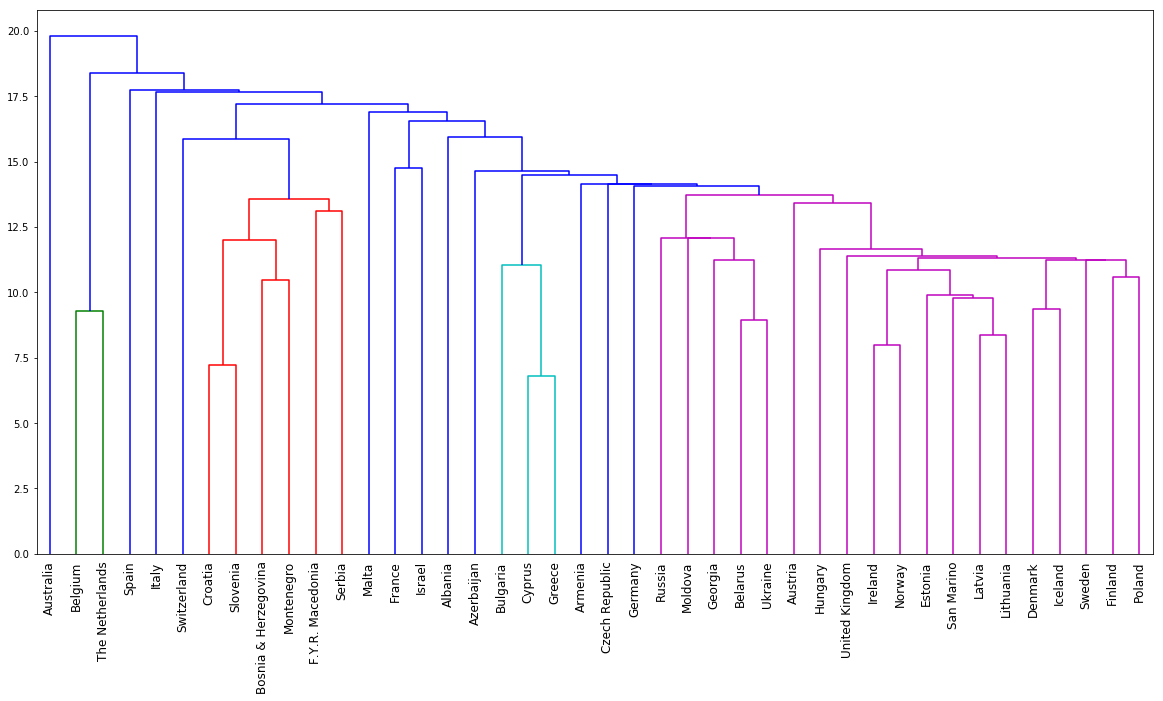

In [46]:
# Plot the dendrogram
plt.figure(figsize=(20,10))
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=12)
plt.show()

### Complete linkage

In [41]:
# Perform a hierarchical clustering of the voting countries with 'complete' linkage
mergings = linkage(samples, method='complete')

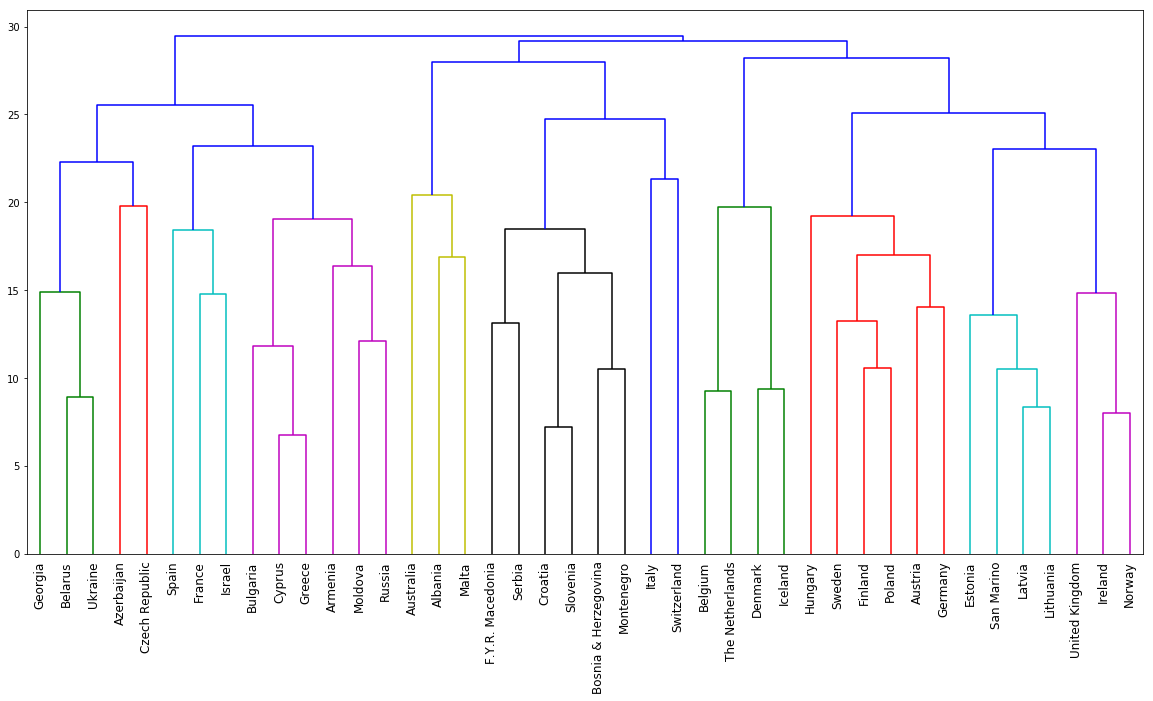

In [44]:
# Plot the dendrogram
plt.figure(figsize=(20,10))
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=12)
plt.show()